In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Activation, Masking, Bidirectional, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pylab as plt

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)

print(trainL)
for i in range(len(trainL)):
    if(trainL[i] != 1):
        trainL[i] = 0
for i in range(len(testL)):
    if(testL[i] != 1):
        testL[i] = 0
print(trainL)
timestep = 30
seq = 300

trainData = trainD.reshape((trainD.shape[0], timestep, seq))
trainLabel = np_utils.to_categorical(trainL, 2)
testData = testD.reshape((testD.shape[0], timestep, seq))
testLabel = np_utils.to_categorical(testL, 2)
print(trainLabel)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[0 0 0 ... 2 2 2]
[0 0 0 ... 0 0 0]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [2]:
model = Sequential()
#, activity_regularizer=regularizers.l2(0.0001)
# , dropout_W=0.2, dropout_U=0.2
model.add(LSTM(8, return_sequences=True, dropout_W=0.2, dropout_U=0.2, input_shape = (timestep, seq)))
model.add(LSTM(8, dropout_W=0.2, dropout_U=0.2))
model.add(Dense(2, activation="softmax"))
print(model.summary())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(30, 300), dropout=0.2, recurrent_dropout=0.2, return_sequences=True)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, dropout=0.2, recurrent_dropout=0.2)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 8)             9888      
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 10,450
Trainable params: 10,450
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
adam = Adam(lr = 0.001)
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
# graph = TensorBoard()
train_history = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=50,
                          validation_data=(testData, testLabel),
                          #callbacks=[graph],
                          batch_size=70,
                          #shuffle=False,
                          )


Train on 7110 samples, validate on 3041 samples
Epoch 1/50
7110/7110 [==============================] - 19s 3ms/step - loss: 0.3002 - acc: 0.9342 - val_loss: 0.1317 - val_acc: 0.9707
Epoch 2/50
7110/7110 [==============================] - 15s 2ms/step - loss: 0.1287 - acc: 0.9705 - val_loss: 0.1219 - val_acc: 0.9704
Epoch 3/50
7110/7110 [==============================] - 15s 2ms/step - loss: 0.1147 - acc: 0.9695 - val_loss: 0.1099 - val_acc: 0.9707
Epoch 4/50
7110/7110 [==============================] - 15s 2ms/step - loss: 0.1071 - acc: 0.9702 - val_loss: 0.1072 - val_acc: 0.9707
Epoch 5/50
7110/7110 [==============================] - 15s 2ms/step - loss: 0.1025 - acc: 0.9700 - val_loss: 0.1076 - val_acc: 0.9707
Epoch 6/50
7110/7110 [==============================] - 15s 2ms/step - loss: 0.0985 - acc: 0.9720 - val_loss: 0.1102 - val_acc: 0.9704
Epoch 7/50
7110/7110 [==============================] - 15s 2ms/step - loss: 0.0941 - acc: 0.9722 - val_loss: 0.1079 - val_acc: 0.9711
Epoch 8

In [4]:
import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

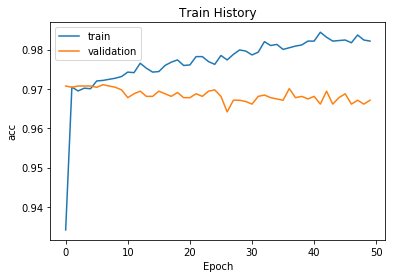

In [5]:
show_plot('acc', train_history)

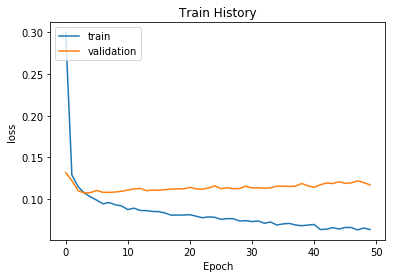

In [6]:
show_plot('loss', train_history)